# Brownian Bridge Variance Simulation Study

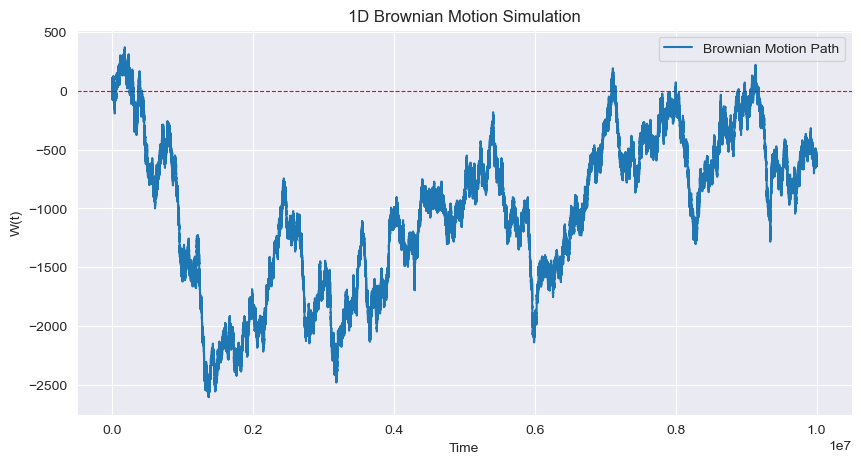

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for Brownian motion
np.random.seed(42)  # For reproducibility
n_steps = 10000000  # Number of time steps
delta_t = 1  # Time increment
T = n_steps * delta_t  # Total time
t = np.linspace(0, T, n_steps)

# Simulate the Brownian motion
# Brownian motion increments follow a normal distribution N(0, sqrt(delta_t))
dW = np.random.normal(0, np.sqrt(delta_t), size=n_steps)
W = np.cumsum(dW)

# Plot the Brownian motion
plt.figure(figsize=(10, 5))
plt.plot(t, W, label="Brownian Motion Path")
plt.axhline(0, color='red', linestyle='--', lw=0.8)
plt.title('1D Brownian Motion Simulation')
plt.xlabel('Time')
plt.ylabel('W(t)')
plt.grid(True)
plt.legend()
plt.show()


In [9]:
# Define a threshold around zero to determine where to partition the path
threshold = 0.1

# Find indices where the Brownian motion crosses near zero
zero_crossings = np.where(np.abs(W) < threshold)[0]

# Identify partitions by slicing the array at zero-crossing points
partitions = np.split(W, zero_crossings)

# Filter out partitions that are too small
partitions = [part for part in partitions if len(part) > 1]

# For visualization, let's show the start and end points of the partitions
partitions_info = [(part[0], part[-1], len(part)) for part in partitions]
partitions_info[:10]  # Show the first 10 partition details (start, end, length)

[(0.4967141530112327, 0.1579478213972021, 349),
 (-0.05549933031464516, 1.6688202842325195, 171),
 (-0.0005849968888522739, 1.0830346220911165, 114),
 (0.07093024683094873, 0.5572814867009426, 221),
 (-0.0134648070485337, -0.2936960502918188, 5),
 (-0.09077302944051907, -1.606517144437751, 2),
 (-0.059011943107689424, -0.1413725603875362, 4902),
 (-0.034164598347402556, 0.7276246309157919, 35),
 (0.07825981130191095, 0.24331569182353352, 31),
 (0.006866855087674151, -1.139487370843391, 2952)]

In [10]:
# Calculate the variance of the entire Brownian motion path
total_variance = np.var(W)

total_variance


430455.49178543873

In [11]:
# Calculate variance for each partition
sub_variances = [np.var(part) for part in partitions]

# Display the first 10 variances as a sample
sub_variances[:10]  # Show first 10 variances


[28.253417528961258,
 11.77526267884562,
 11.97557681695469,
 12.911283053060032,
 0.11924641826454538,
 0.5743700555371855,
 828.737329204137,
 1.7269726751053074,
 3.2546250021115513,
 212.9248036315599]

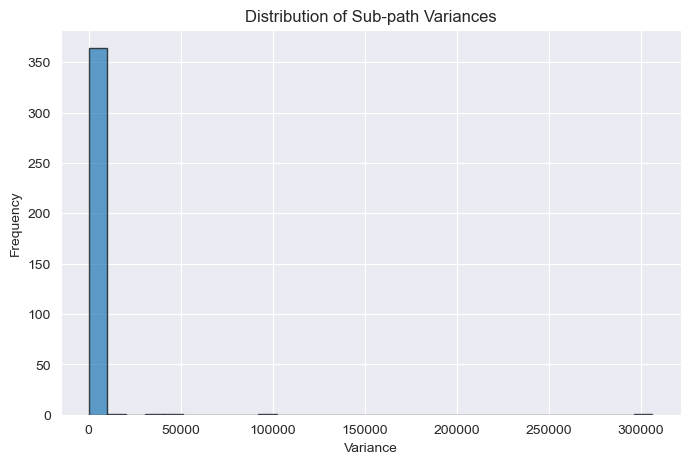

In [12]:
# Plot the histogram of sub-path variances
plt.figure(figsize=(8, 5))
plt.hist(sub_variances, bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Sub-path Variances')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [13]:
# Compute the log returns, avoiding zero or negative values (since log isn't defined for those)
W_nonzero = W[W > 0]  # Exclude non-positive values
log_returns = np.diff(np.log(W_nonzero))

# Estimate volatility as the standard deviation of the log returns
volatility = np.std(log_returns)

volatility


0.13650614457550483

In [14]:
# Shift the Brownian motion path by adding a positive baseline to ensure all values are positive
baseline_shift = np.abs(np.min(W)) + 1  # Shift by the absolute minimum value plus a small constant
W_shifted = W + baseline_shift

# Compute log returns on the shifted values
log_returns_shifted = np.diff(np.log(W_shifted))

# Estimate volatility as the standard deviation of the log returns
volatility_shifted = np.std(log_returns_shifted)

volatility_shifted


0.0019111590870545601